In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the datasets
wine_df = pd.read_csv(r"C:\Users\Shadvi\OneDrive\Desktop\Assignment8\WineQT.csv")
students_df = pd.read_csv(r"C:\Users\Shadvi\OneDrive\Desktop\Assignment8\Student_performance_data _.csv")

In [6]:
# Display first few rows of each dataset
wine_df.head(), students_df.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  quality  Id  
 0      9.4        5   0  
 1      9.8       

In [ ]:
#Q1 Key Features of the Wine Quality Dataset
print("\nSummary of Wine Quality Dataset:")
print(wine_df.info())

# Checking descriptive statistics
print("\nDescriptive statistics of Wine Quality Dataset:")
print(wine_df.describe())

# Discussing key features
description = {
    "fixed acidity": "Affects the taste and stability of wine.",
    "volatile acidity": "Too much can lead to an unpleasant vinegar taste.",
    "citric acid": "Enhances freshness and stability.",
    "residual sugar": "Higher levels contribute to sweetness.",
    "chlorides": "Influences saltiness and preservation.",
    "free sulfur dioxide": "Prevents spoilage but can impact taste.",
    "total sulfur dioxide": "Maintains stability but excessive amounts are undesirable.",
    "density": "Higher density indicates more sugar and alcohol.",
    "pH": "Impacts wine stability and taste.",
    "sulphates": "Acts as an antioxidant and preservative.",
    "alcohol": "Higher alcohol content often improves quality.",
    "quality": "Target variable, ranges from 0 to 10."
}
for feature, desc in description.items():
    print(f"{feature}: {desc}")


Summary of Wine Quality Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

Descriptive statistics of Wine Qual

In [ ]:
#Q2 Handling Missing Data
print("\nChecking for missing values in Wine Quality Dataset:")
print(wine_df.isnull().sum())

# If missing values exist, use imputation techniques
# Example: Filling missing values with mean
wine_df.fillna(wine_df.mean(), inplace=True)

print("\nChecking for missing values in Student Performance Dataset:")
print(students_df.isnull().sum())

# Example: Filling categorical missing values with mode
for column in students_df.select_dtypes(include=['object']).columns:
    students_df[column].fillna(students_df[column].mode()[0], inplace=True)

# Discussion of different imputation techniques
print("\nDifferent Imputation Techniques:")
techniques = {
    "Mean Imputation": "Useful for numerical features but can distort variance.",
    "Median Imputation": "Better for skewed data but may not always be representative.",
    "Mode Imputation": "Best for categorical features but may introduce bias.",
    "KNN Imputation": "Uses neighboring values but is computationally expensive."
}
for method, explanation in techniques.items():
    print(f"{method}: {explanation}")


Checking for missing values in Wine Quality Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Checking for missing values in Student Performance Dataset:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Different Imputation Techniques:
Mean Imputation: Useful for numerical features but can distort variance.
Median Imputation: Better for skewed data but may not always be repre

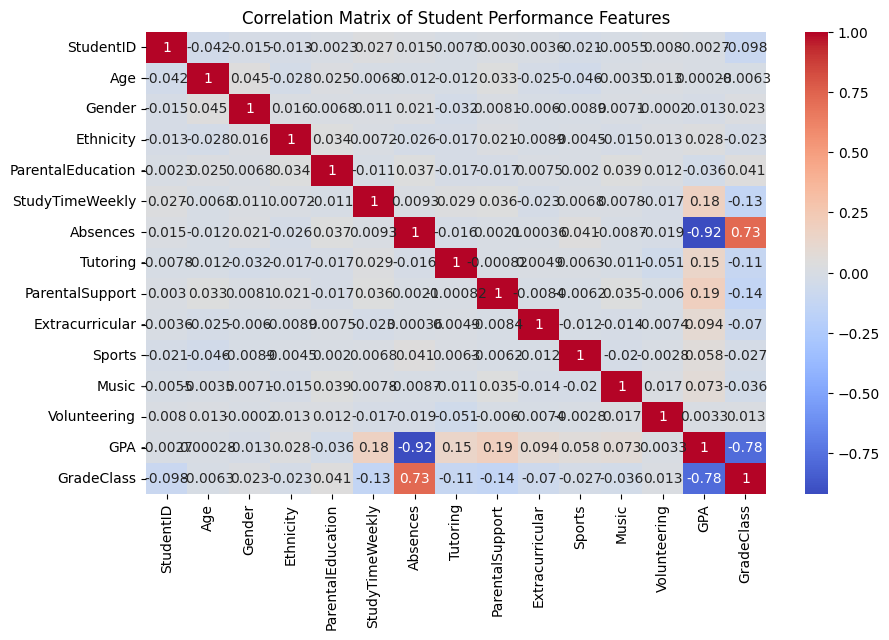

Study time: More study time often leads to better performance.
Parental education: Higher parental education levels correlate with better scores.
Attendance: Regular attendance is critical for learning.
Sleep hours: Lack of sleep negatively affects cognitive function.
Internet access: Can be helpful for research but also a distraction.


In [ ]:
#Q3 Key Factors Affecting Students' Performance
# Checking correlations
plt.figure(figsize=(10,6))
sns.heatmap(students_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Student Performance Features")
plt.show()

# Discussing statistical analysis approaches
factors = {
    "Study time": "More study time often leads to better performance.",
    "Parental education": "Higher parental education levels correlate with better scores.",
    "Attendance": "Regular attendance is critical for learning.",
    "Sleep hours": "Lack of sleep negatively affects cognitive function.",
    "Internet access": "Can be helpful for research but also a distraction."
}
for factor, explanation in factors.items():
    print(f"{factor}: {explanation}")

In [33]:
#Q4 Feature Engineering for Student Performance Dataset
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataset
df = students_df.copy()

# List of categorical columns to encode
categorical_cols = ['gender', 'ethnicity', 'parentaleducation', 'tutoring', 'parentalsupport',
                    'extracurricular', 'sports', 'music', 'volunteering', 'gradeclass']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Create new feature: Performance = 1 if GPA >= 3.0 else 0
df['Performance'] = (df['gpa'] >= 3.0).astype(int)

# Display the transformed dataframe
df.head()


,studentid,age,gender,ethnicity,parentaleducation,studytimeweekly,absences,tutoring,parentalsupport,extracurricular,sports,music,volunteering,gpa,gradeclass,Performance
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2,0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3,0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4,0


<Figure size 1200x800 with 0 Axes>

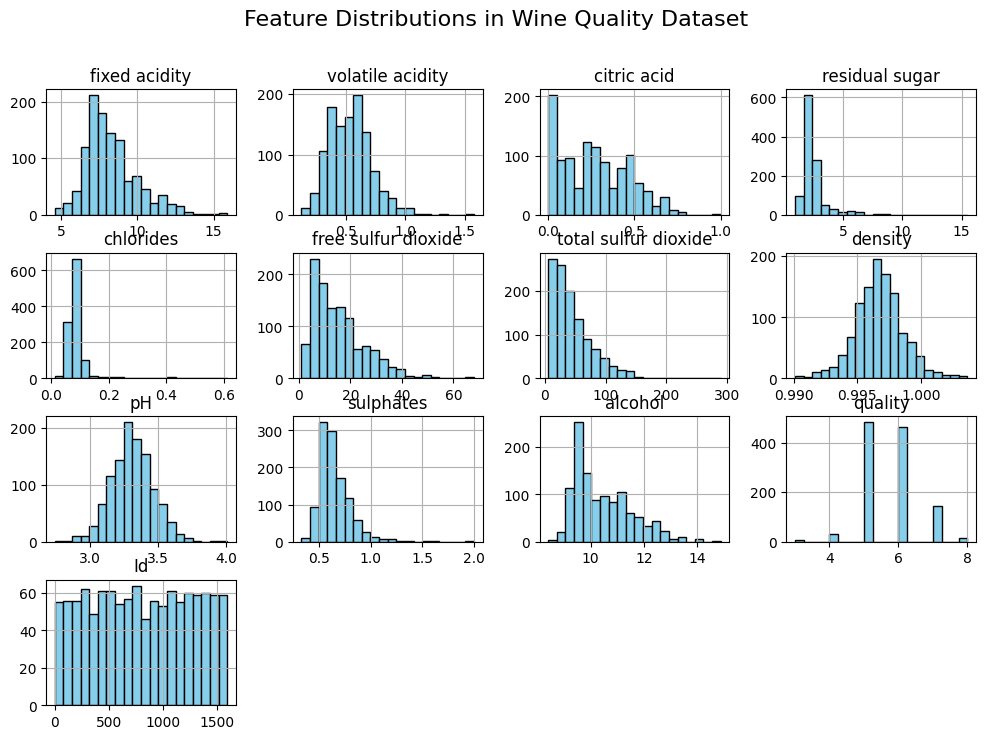


Features with high skewness:
chlorides               6.026360
residual sugar          4.361096
sulphates               2.497266
total sulfur dioxide    1.665766
free sulfur dioxide     1.231261
fixed acidity           1.044930
dtype: float64


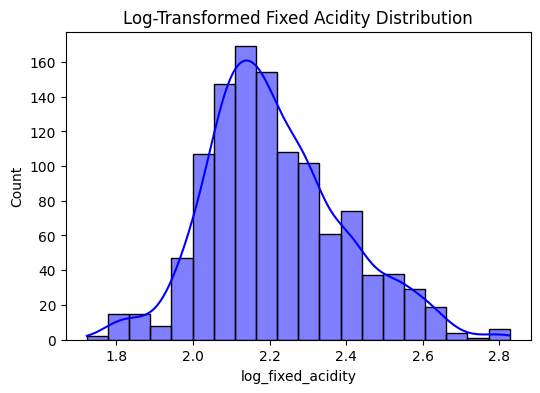

In [32]:
#Q5 Exploratory Data Analysis (EDA) on Wine Quality Dataset
plt.figure(figsize=(12,8))
wine_df.hist(bins=20, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions in Wine Quality Dataset", fontsize=16)
plt.show()

# Identifying non-normal features
skewed_features = wine_df.skew().sort_values(ascending=False)
print("\nFeatures with high skewness:")
print(skewed_features[skewed_features > 1])

# Applying transformations to improve normality
wine_df['log_fixed_acidity'] = np.log1p(wine_df['fixed acidity'])
plt.figure(figsize=(6,4))
sns.histplot(wine_df['log_fixed_acidity'], bins=20, kde=True, color='blue')
plt.title("Log-Transformed Fixed Acidity Distribution")
plt.show()